# The Power of Elon Musk

In [11]:
# Read data from CSV files
sys.path.insert(1, './tweets code')
sys.path.insert(2, './sentiment code')
sys.path.insert(3, './trends code')
pathtofile = ''
sys.path.insert(1, pathtofile + './tweets code')
sys.path.insert(2, pathtofile + './sentiment code')
sys.path.insert(3, pathtofile + './trends code')


# import trends from trendscode
import trendscode.trends as trends

#import topics from tweetscode
import tweetscode.topics as topics


# import topics
import pytrends
from time import sleep
import pandas as pd
from datetime import timedelta
from matplotlib.dates import date2num
import matplotlib.pyplot as plt
import tweetscode.bg_analysis as bg_analysis
from tweetscode.main import read_tweets, unzip_dataset
import os
import sys
# from bg_analysis import background_analysis
import sentimentcode.sentiment as sentiment
import numpy as np
unzip_dataset()
tweets_df = read_tweets()

# from main import read_tweets
# tweets_df = read_tweets()


In [12]:
# import trends
# import topics
from time import sleep
import pandas as pd
from datetime import timedelta
from matplotlib.dates import date2num
import matplotlib.pyplot as plt


topics_df = topics.get_tweets_with_topic(tweets_df)
likes_avg = tweets_df['likes_count'].mean()

# Enter your cookie here
cookie = r'NID=511=ojsQL8F4xu5IhakmE0tBJy9zlvJrqXDU2FiNkc5IF_HnP0D2z_e2X0_0z-Eqw_dOp4Ux78nGLUm2PxiXn9Uw5LGLnpXNJzI_uN1PoUdWB6XfUUxRZG-MsqqKxVE9FZD-4j6OmEJ8DAIazSaGHHVNpSTOWdrEKABgKRpCmUhU-LbOxc0Oqynv1nVvCvwwEIAeLVSaLQr3IfOsqZOIcjZ7rzsvg3uPsXkhdEkvL8eZ9MgLjoa3HS0O3sDwjSHAZWxyh6fos_CchA7hxr_SClotJgTlks2GQbyLt32_ssiy4-7as0mULA_YDXR_H1Duv2Eh0oXEw_gY8jPAa696EMc284yIt9-EsaLwVTZA9bAZA1BHsdl4yuyrDpjrEzvSogLwcCyfBSmChBRAHs7trRmhqVO9Ds_c6rN-09t6fEx3h3k4EO9VjancJUhcLnbjDoQ3hD1MtDM3nqLMaz2EiQSamIYkKpUHp6RnU1GBsMel6rW0khjDwvep6GZZyIcZQOGbivj7SgE; CONSENT=YES+CN.zh-TW+; 1P_JAR=2023-3-16-21; ANID=AHWqTUnQlhsaYTxiDxdq0w6dl8x4x3BYluWutA72D0J0V9R0XYB7q8u-IXGhZ8VE; SID=TwjzvCjxk3gMCRQTHcp7Akluf_TOBbjfA27JSNae-RmEUJLCg8-POsJRvKYggbKhytipRg.; __Secure-1PSID=TwjzvCjxk3gMCRQTHcp7Akluf_TOBbjfA27JSNae-RmEUJLCSzYlEcBsY1lGEOj16FMuOg.; __Secure-3PSID=TwjzvCjxk3gMCRQTHcp7Akluf_TOBbjfA27JSNae-RmEUJLCYCx5p5WhIhb_odf8xizkag.; HSID=Ap9NzoM13RpujqKHT; SSID=APXsFprZq1ReCVzVX; APISID=A9l74q0_JM0DhqD3/A4eWfnXsColUco5yd; SAPISID=E9Tu_N8jVwQjTXDK/A0F5MKsvS7GXVk0aE; __Secure-1PAPISID=E9Tu_N8jVwQjTXDK/A0F5MKsvS7GXVk0aE; __Secure-3PAPISID=E9Tu_N8jVwQjTXDK/A0F5MKsvS7GXVk0aE; SIDCC=AFvIBn8b2NySLYAgWSEVvHGoWhULC-pwCG59Lv5RrDblEAnuz0SIHrZNWz9mseRnjQ83wnCE0e5G; __Secure-3PSIDCC=AFvIBn8jBCUaJayAR82HKe00eK3LZ1vnOoSh0JDNcJAyKQNX8W5LshPa_ZR5jb0DpwRTXi2uTKk; __Secure-1PSIDCC=AFvIBn9bUNv6ZDS8ELPpm0Y7wpER51IRXhyZvVUlclJgl-Dwlpbd1CX1yeCUFUVKMLh8avN40iQ; AEC=ARSKqsLUNNqBUkjWqSsw0KmMiBiOtq6hDWloj3ik7YUiB1KcloZOHnnN-w; OTZ=6939044_84_88_104280_84_446940; S=billing-ui-v3=lCIr2-uN6StA-ws6F_-TcQmpgADy43Lv:billing-ui-v3-efe=lCIr2-uN6StA-ws6F_-TcQmpgADy43Lv'


def search_analysis(topic, topics_df, threshlow=30):
    '''
    topic: string, can be one of 'tesla', 'twitter', 'bitcoin', 'dogecoin', 'ford'
    topics_df: the return value of topics.get_tweets_with_topic()
    threshlow: number, the low threshold of peak

    return: the dataframe of important tweets
    '''
    import importlib
    importlib.reload(trends)

    kws = topics.KW_DICT[topic]
    # analysis start from 2015, because we cannot get any information from the data before 2015
    key_dates = trends.find_key_dates(
        kws, cookie, tf='2015-05-01 2022-03-05', threshlow=threshlow)
    key_dates = list(key_dates.stack().dropna().drop_duplicates())
    sleep(1.43)
    trend_df = trends.plot_trends(
        kws, cookie, key_dates, tf='2015-01-01 2022-03-05')
    trend_df.drop('isPartial', axis=1, inplace=True)

    plt.figure(figsize=(15, 6))
    for y in trend_df.columns:
        plt.plot(trend_df.index, trend_df[y])

    topic_df = topics_df[topic]
    # find all tweets have a date 30 days before any dat in the key date list
    key_tweets = pd.DataFrame()
    delta = timedelta(days=30)
    for d in key_dates:
        d = d.tz_localize('US/Central')
        t = topic_df[(topic_df['date'] >= d - delta) & (topic_df['date']
                                                        < d) & (topic_df['likes_count'] > likes_avg)]
        key_tweets = pd.concat([key_tweets, t])
    key_tweets = key_tweets.drop_duplicates()

    key_tweets_dates = list(key_tweets['date'].drop_duplicates())
    plt.vlines([date2num(d) for d in key_tweets_dates], 0, 100, colors='r', linewidth=0.5)

    plt.legend(labels=trend_df.columns)
    plt.savefig('./fig/' + topic + '.png')

    plt.show()
    plt.clf()

    return key_tweets


## Tesla

First Plot: Tesla google search trend Vs Time


Second Plot: Tesla google search trend Vs Time with Elon Musk's Tesla tweets as vertical red lines 

FileNotFoundError: [Errno 2] No such file or directory: './fig/tesla.png'

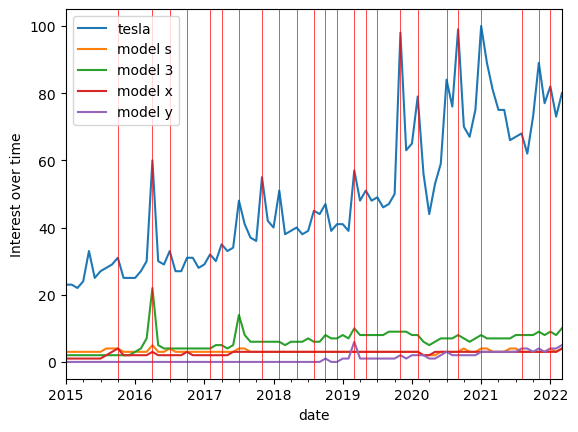

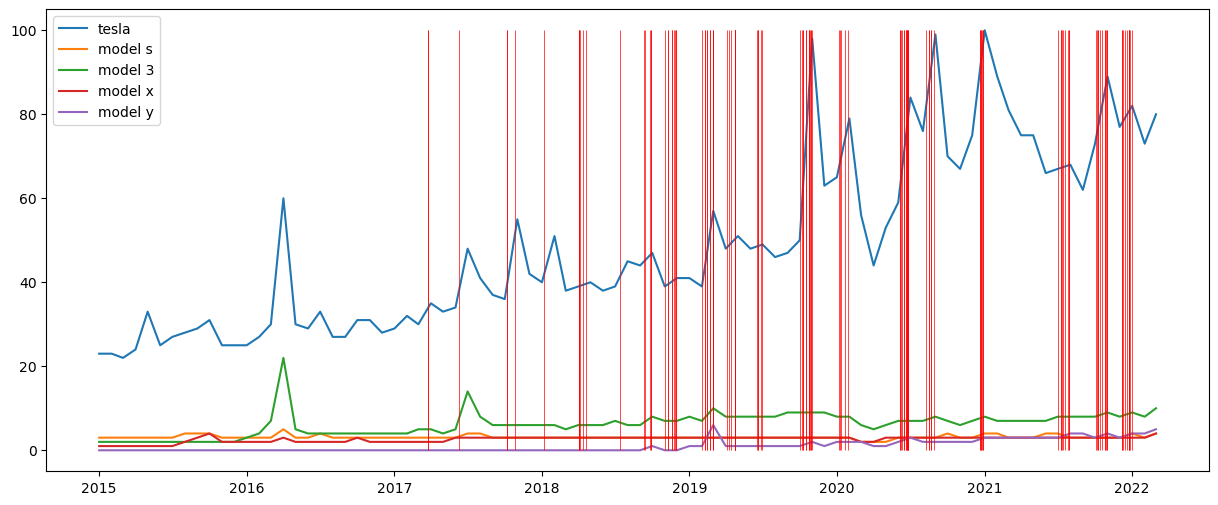

In [13]:
if not os.dir('fig'):
    os.mkdir('fig')
tesla_key_tweets = search_analysis('tesla', topics_df)

## Twitter

First Plot: Twitter google search trend Vs Time


Second Plot: Twitter google search trend Vs Time with Elon Musk's Twitter tweets as vertical red lines 

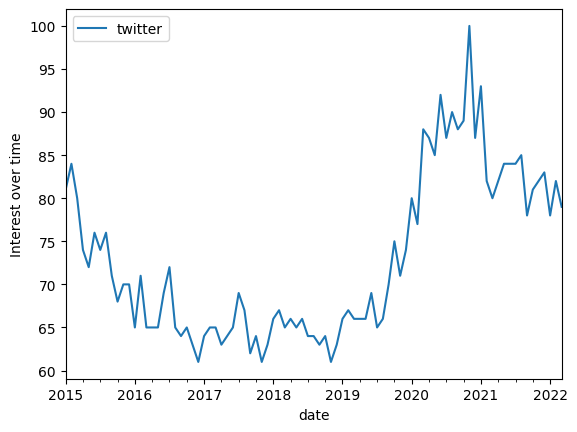

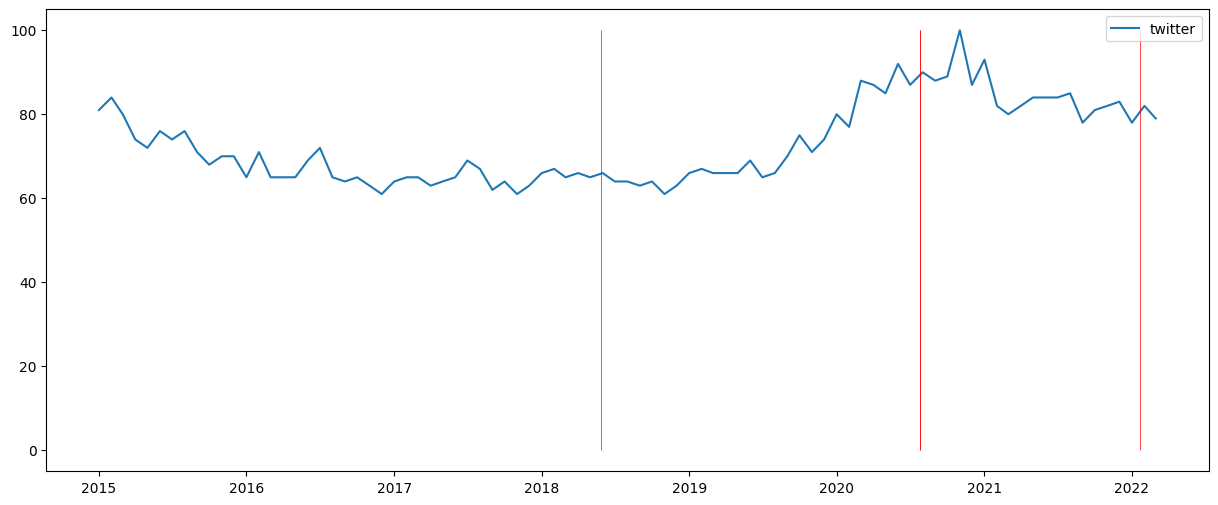

<Figure size 640x480 with 0 Axes>

In [4]:
twitter_key_tweets = search_analysis('twitter', topics_df)

## Bitcoin

First Plot: Bitcoin google search trend Vs Time


Second Plot: Bitcoin google search trend Vs Time with Elon Musk's Bitcoin tweets as vertical red lines 

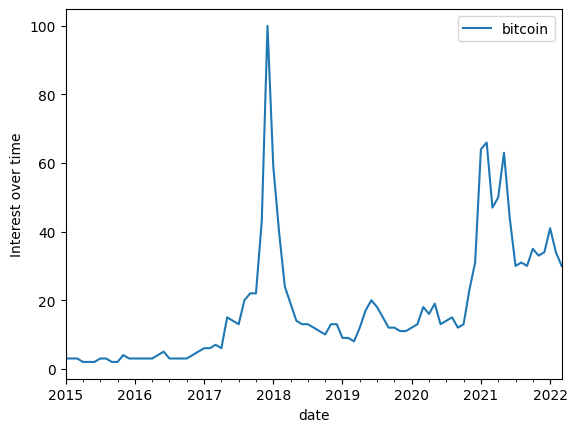

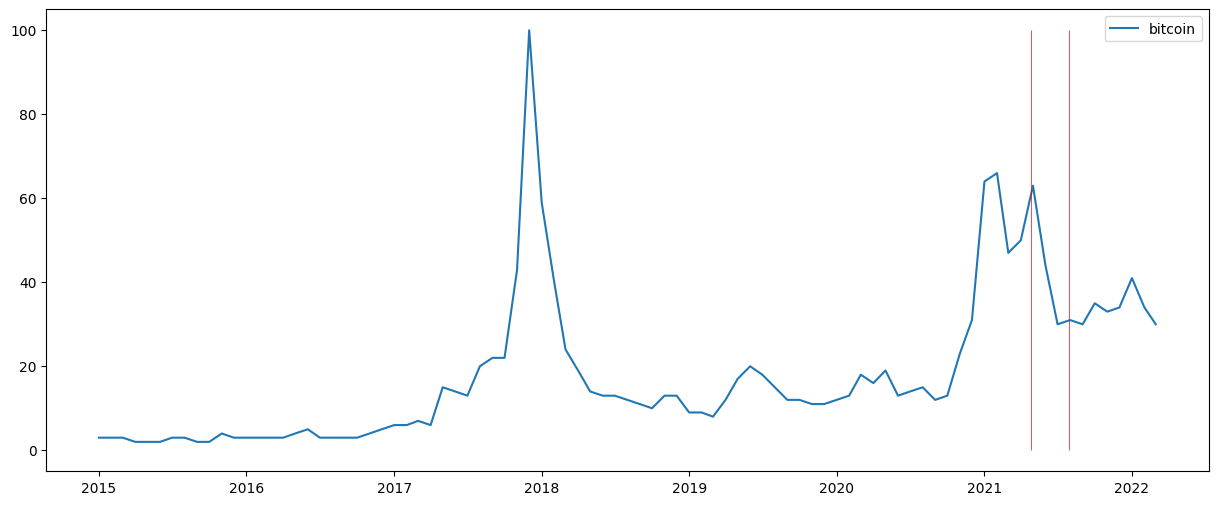

<Figure size 640x480 with 0 Axes>

In [5]:
bit_key_tweets = search_analysis('bitcoin', topics_df, threshlow=20)

## Dogecoin

First Plot: Dogecoin google search trend Vs Time


Second Plot: Dogecoin google search trend Vs Time with Elon Musk's Dogecoin tweets as vertical red lines 

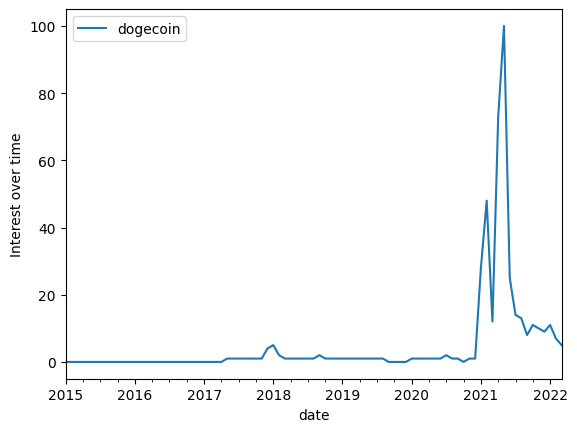

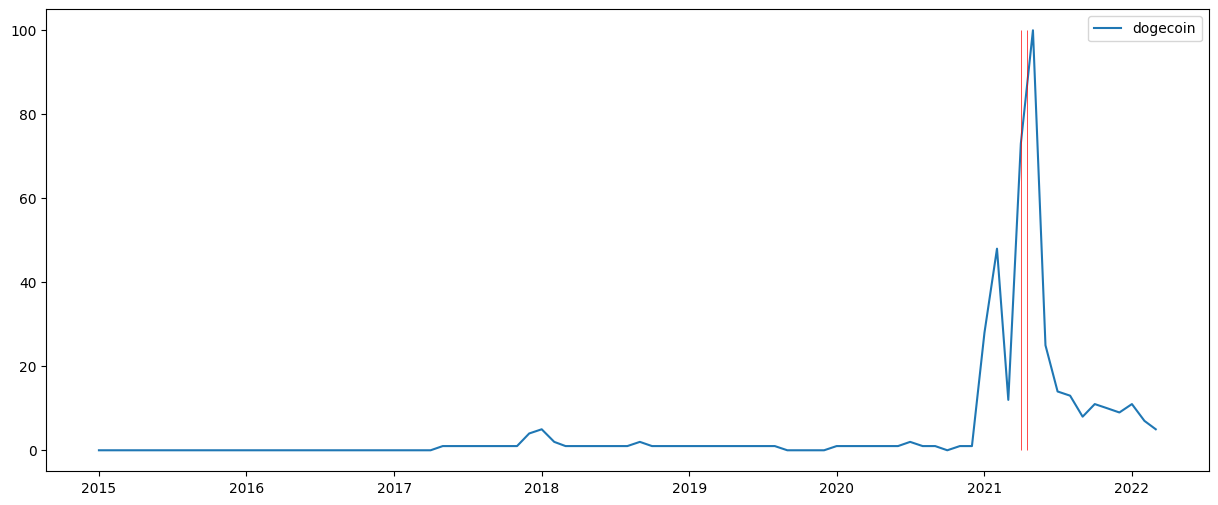

<Figure size 640x480 with 0 Axes>

In [6]:
doge_key_tweets = search_analysis('dogecoin', topics_df)

## Sentiment Analysis

Basic analysis of Elon Musk tweets dataset

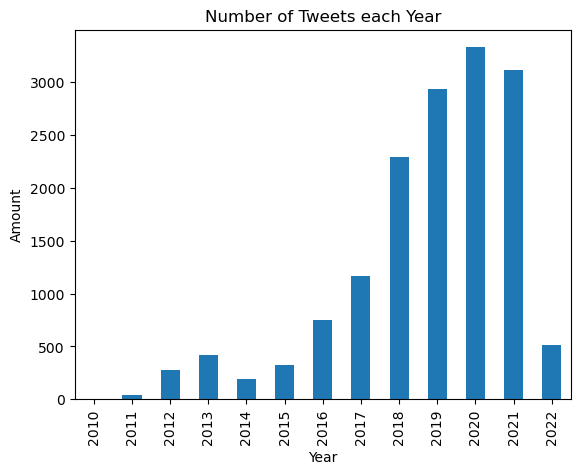

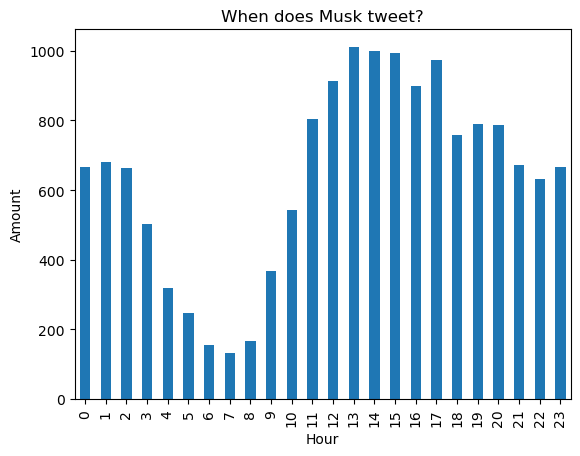

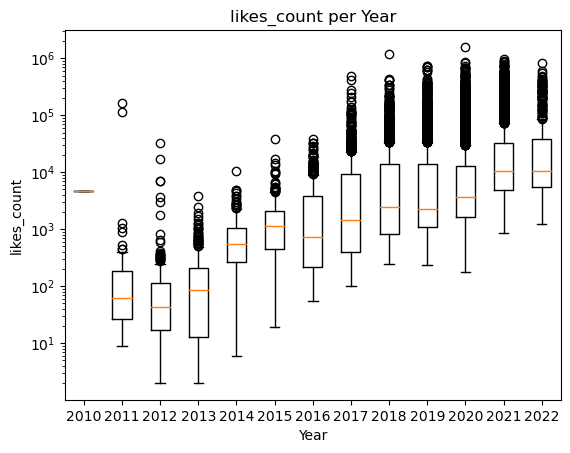

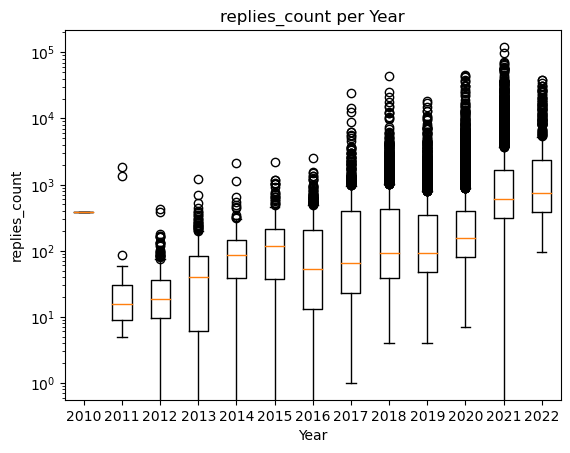

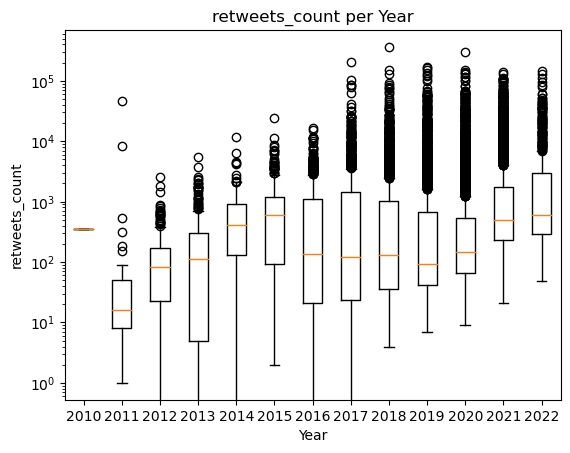

In [6]:
# Read data from CSV files
import os
import sys
from main import read_tweets
from bg_analysis import background_analysis
from sentiment import sentimentAnalysis
tweets_df = read_tweets()
os.makedirs(os.path.dirname('./fig/'), exist_ok=True)
background_analysis(tweets_df)
tweets_df = sentimentAnalysis(tweets_df)

Sentiment Analysis of Influential Tweets

In [8]:
import pandas as pd
#pie chart for Tweet Sentiment
infl_tweets_id = [1408246196603346947, 1340573003579617280, 1215526980449255424, 1340588909974200321, 1054520588734058496, 1386821144037236737, 1420529868404518913, 1461942451053252612, 1538406040374595585, 1377567762919292938, 1198751258384818176, 1347165127036977153, 270972990756364288, 1421203369058787332, 1421152540394143746, 1354174279894642703, 1354018055014260738, 1055585815718322178, 1055882299756109824, 1055993647995412481, 1162061693809094657, 1498858611241635843]
infl_tweets_df = pd.DataFrame()
for tweet in infl_tweets_id:
    row = tweets_df.loc[tweets_df['id'] == tweet]
    infl_tweets_df = pd.concat([row,infl_tweets_df.loc[:]]).reset_index(drop=True)

sentiment_sum = 0
count = 0
positive_sentiment = 0
negative_sentiment = 0
neutral_sentiment = 0 
sentiment = []
for x in infl_tweets_df.loc[:,'tweet_sentiment']:
    if x == 0:
        neutral_sentiment += 1 
        sentiment.append('neutral')
    if x>0:
        positive_sentiment += 1
        sentiment.append('positive')
    if x<0:
        negative_sentiment += 1
        sentiment.append('negative')
    count += 1
    sentiment_sum += x 
infl_tweets_df['sentiment'] = sentiment 
print(negative_sentiment,"negative sentiment tweets")
print(positive_sentiment,"positive sentiment tweets")
print(neutral_sentiment, "neutral sentiment tweets")
avg_sentiment = sentiment_sum/count
if avg_sentiment == 0:
    print("average sentiment is neutral", avg_sentiment)
if avg_sentiment>0:
    print("average sentiment is positive", avg_sentiment)
if avg_sentiment<0:
    print("average sentiment is negative", avg_sentiment)

6 negative sentiment tweets
5 positive sentiment tweets
10 neutral sentiment tweets
average sentiment is negative -0.009909523809523802


Pie Chart of Tweet Sentiment Distribution

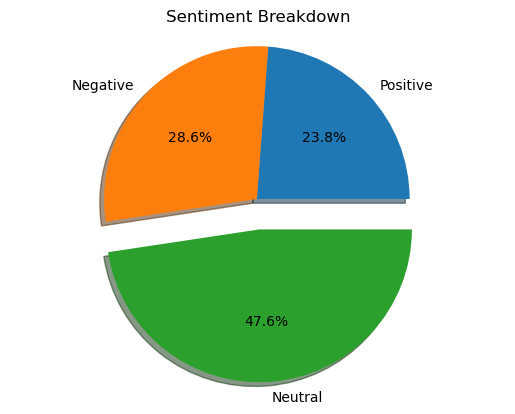

In [9]:
import matplotlib.pyplot as plt
import numpy as np
#pie chart 
y = np.array([positive_sentiment, negative_sentiment, neutral_sentiment])
max_sentiment = np.argmax(y, axis = 0)
mylabels = ["Positive", "Negative", "Neutral"]
myexplode = [0, 0, 0]
myexplode[max_sentiment] = 0.2

plt.pie(y, labels = mylabels, explode = myexplode, shadow = True, autopct='%1.1f%%')
plt.axis('equal')
plt.title('Sentiment Breakdown')
plt.show()

Tweet Sentiment vs Engagement

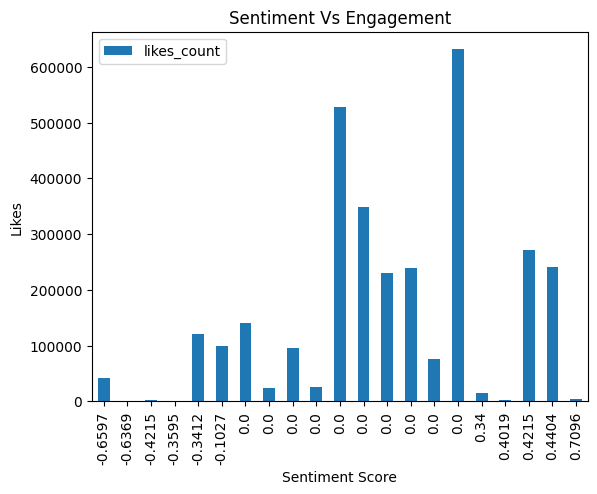

In [11]:
infl_tweets_df = infl_tweets_df.sort_values(by="tweet_sentiment")
infl_tweets_df.plot(x="tweet_sentiment", y="likes_count", kind = "bar")
plt.xlabel('Sentiment Score')
plt.ylabel('Likes')
plt.title('Sentiment Vs Engagement')
plt.show()     

Scatter Plot of Tweet Sentiment Vs Engagement Over Entire Dataset

c:\Users\24071\venv\lib\site-packages\pandas\plotting\_matplotlib\core.py:1259: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


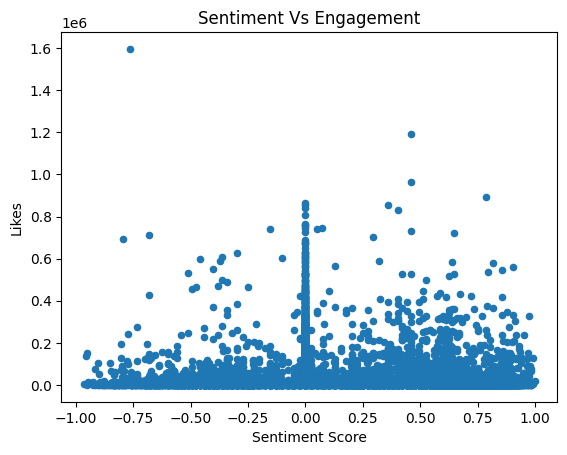

In [12]:
scatter = tweets_df.plot.scatter(x='tweet_sentiment',
                    y='likes_count',
                    colormap='viridis')
plt.xlabel('Sentiment Score')
plt.ylabel('Likes')
plt.title('Sentiment Vs Engagement')
plt.show() 

Bar Graph of Tweet Sentiment Vs Engagement over Influential Tweets Dataset

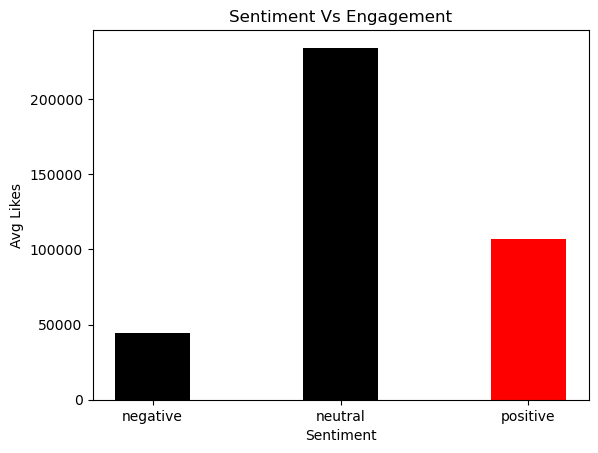

In [10]:
#avg engagement for a positive tweet, neutral tweet, negative tweet
grp=infl_tweets_df.groupby('sentiment')
sent_list = ['negative', 'neutral', 'positive']
avg_likes = []
grp.get_group('negative')
for i in sent_list:
    temp = grp.get_group(i)['likes_count']
    temp = np.array(temp)
    avg_likes.append(np.mean(temp))
y = np.array(avg_likes)
mylabels = sent_list
plt.bar(mylabels, avg_likes , color =['black', 'black', 'red'], width = 0.4)
plt.xlabel("Sentiment")
plt.ylabel("Avg Likes")
plt.title("Sentiment Vs Engagement")
plt.show()



dataframe for tweet and sentiment score of influential tweets

## Price Analysis

In [14]:
df2 = infl_tweets_df[['tweet', 'sentiment']].copy()

Adding price volume to tweets in dataset

In [15]:
id = [1408246196603346947, 1340573003579617280
,1215526980449255424,
1340588909974200321,
1054520588734058496,
1386821144037236737,
1420529868404518913,
1461942451053252612,
1377567762919292938,
270972990756364288,
1421203369058787332,
1421152540394143746,
1354174279894642703,
1198751258384818176,
1055585815718322178,
1055882299756109824,
1055993647995412481,
1162061693809094657,
1498858611241635843]
vol = [0.02,
0.05,
0.07,
0.05,
-0.02,
-0.09,
0.1,
-0.03,
0.73,
0.03,
0.00,
0.00,
0.09,
0.16,
0.3,
0.13,
0.13,
-0.04,
0.03]
for i in range(len(id)):
        row = infl_tweets_df['id'] == id[i]
        infl_tweets_df.loc[row, 'volume_correlation'] = vol[i]

Plot of Price Volume vs Engagement in Influential Tweets Dataset

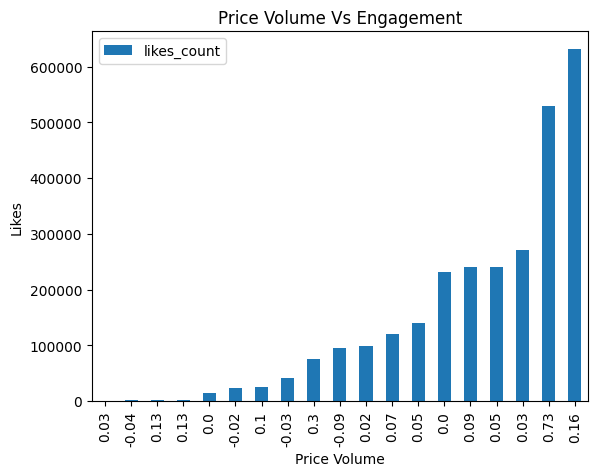

In [16]:
vol_df = infl_tweets_df.dropna(subset=['volume_correlation'])
vol_df = vol_df.sort_values(by="likes_count")
vol_df.plot(x="volume_correlation", y="likes_count", kind = "bar")
plt.xlabel('Price Volume')
plt.ylabel('Likes')
plt.title('Price Volume Vs Engagement')
plt.show() 

Adding Price %Change in Influential Tweets Dataset

In [17]:
id = [1408246196603346947, 1340573003579617280
,1215526980449255424,
1340588909974200321,
1054520588734058496,
1386821144037236737,
1420529868404518913,
1461942451053252612,
270972990756364288,
1421203369058787332,
1421152540394143746,
1354174279894642703,
1198751258384818176,
1055585815718322178,
1055882299756109824,
1055993647995412481,
1162061693809094657,
1498858611241635843]
price = [-0.02,
0.04,
0.02,
0.04,
0.00,
0.01,
0.03,
0.01,
0.01,
0.00,
0.00,
0.45,
-0.01,
0.02,
0.02,
0.02,
-0.01,
0.01,]
for i in range(len(id)):
        row = infl_tweets_df['id'] == id[i]
        infl_tweets_df.loc[row, 'price_correlation'] = price[i]

Plot of Price %Change Vs Engagement on Influential Tweets Dataset

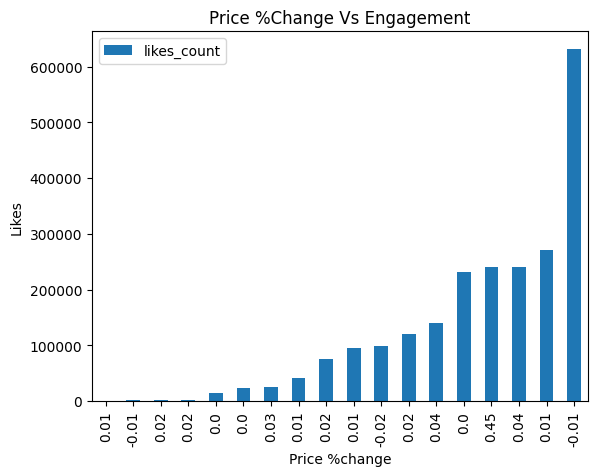

In [23]:
price_df = infl_tweets_df.dropna(subset=['price_correlation'])
#plot price volume vs sentiment
price_df = price_df.sort_values(by="likes_count")
price_df.plot(x="price_correlation", y="likes_count", kind = "bar")
plt.xlabel('Price %change')
plt.ylabel('Likes')
plt.title('Price %Change Vs Engagement')
plt.show() 

## Stock Price Analysis 

Seperating Stock and crypto data into two datasets

In [18]:
vol_stock = infl_tweets_df[['tweet', 'likes_count', 'volume_correlation', 'price_correlation', 'tweet_sentiment']].copy()
vol_stocks = vol_stock.iloc[[18, 3, 2, 17, 14, 20, 13, 12, 16, 1, 11, 15]]
vol_crypto = vol_stock.iloc[[10, 0, 9, 8, 7, 6, 4, 19, 5]]

Plot of Stock Price Volume Vs Tweet Enagement

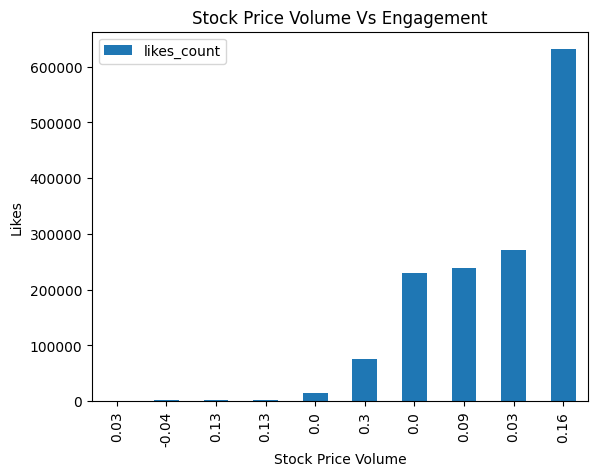

In [19]:
vol_stocks = vol_stocks.dropna(subset=['volume_correlation'])
#plot price volume vs sentiment
vol_stocks = vol_stocks.sort_values(by="likes_count")
vol_stocks.plot(x="volume_correlation", y="likes_count", kind = "bar")
plt.xlabel('Stock Price Volume')
plt.ylabel('Likes')
plt.title('Stock Price Volume Vs Engagement')
plt.show() 

Scatter Plot of Stock Price Volume Vs Tweet Enagement with Sentiment as a Colormap

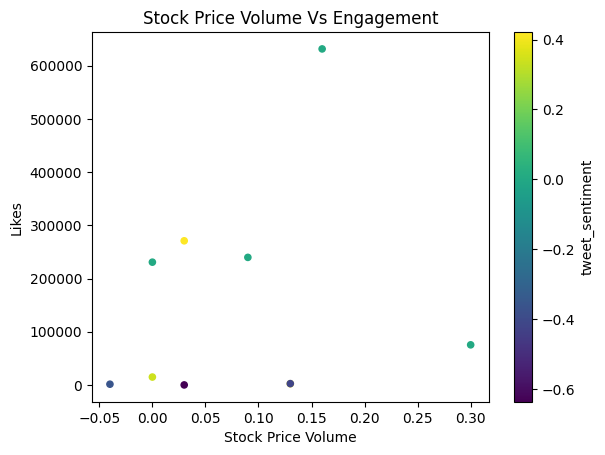

In [20]:
scatter = vol_stocks.plot.scatter(x='volume_correlation',
                    y='likes_count',
                    c = 'tweet_sentiment',
                    colormap='viridis')
plt.xlabel('Stock Price Volume')
plt.ylabel('Likes')
plt.title('Stock Price Volume Vs Engagement')
plt.show() 

Scatter Plot of Stock Price %Change Vs Tweet Engagement with Sentiment as a Colormap

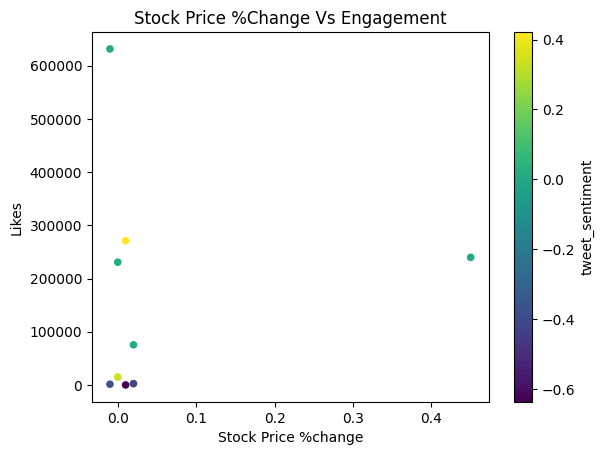

In [24]:
scatter = vol_stocks.plot.scatter(x='price_correlation',
                    y='likes_count',
                    c = 'tweet_sentiment',
                    colormap='viridis')
plt.xlabel('Stock Price %change')
plt.ylabel('Likes')
plt.title('Stock Price %Change Vs Engagement')
plt.show() 

## Crypto Price Analysis

Plot of Crypto Price Volume Vs Tweet Enagement

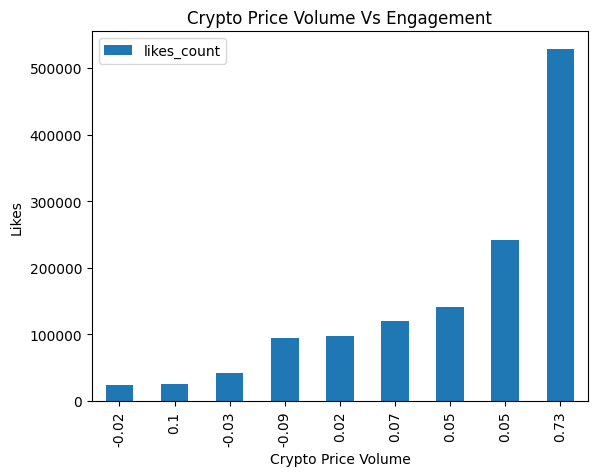

In [21]:
vol_crypto = vol_crypto.dropna(subset=['volume_correlation'])
#plot price volume vs sentiment
vol_crypto = vol_crypto.sort_values(by="likes_count")
vol_crypto.plot(x="volume_correlation", y="likes_count", kind = "bar")
plt.xlabel('Crypto Price Volume')
plt.ylabel('Likes')
plt.title('Crypto Price Volume Vs Engagement')
plt.show() 

Scatter Plot of Crypto Price Volume Vs Tweet Enagement with Sentiment as a Colormap

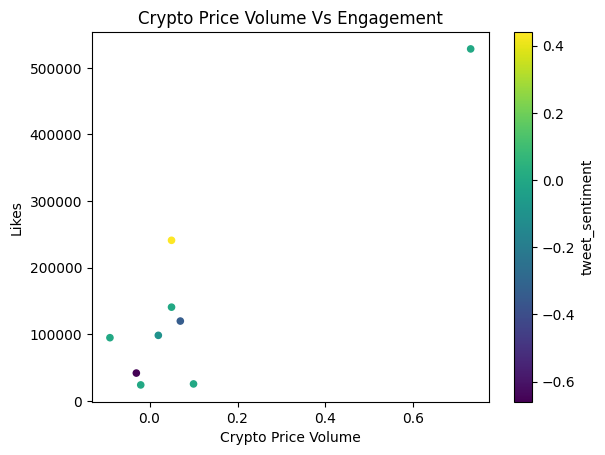

In [22]:
scatter = vol_crypto.plot.scatter(x='volume_correlation',
                    y='likes_count',
                    c = 'tweet_sentiment',
                    colormap='viridis')
plt.xlabel('Crypto Price Volume')
plt.ylabel('Likes')
plt.title('Crypto Price Volume Vs Engagement')
plt.show() 

Scatter Plot of Crypto Price %Change Vs Tweet Engagement with Sentiment as a Colormap

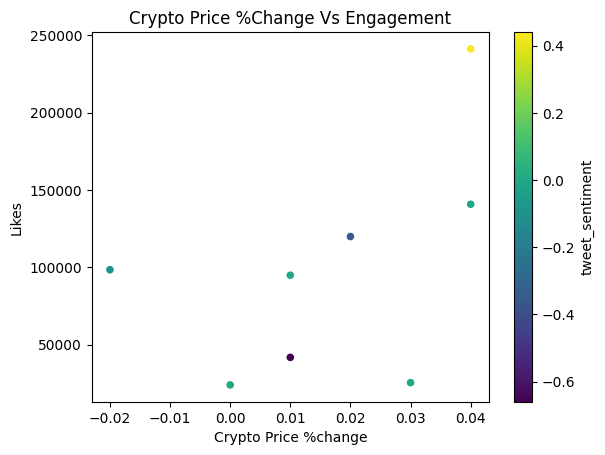

In [25]:
scatter = vol_crypto.plot.scatter(x='price_correlation',
                    y='likes_count',
                    c = 'tweet_sentiment',
                    colormap='viridis')
plt.xlabel('Crypto Price %change')
plt.ylabel('Likes')
plt.title('Crypto Price %Change Vs Engagement')
plt.show() 